# Data Source：
Lending Club：https://www.lendingclub.com/info/download-data.action

# Data Research

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# 导入数据文件
df = pd.read_csv('F:\Python\data\LoanStats_2016Q3.csv', skiprows=1, low_memory=False)
df.info() # 查看文件属性

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99122 entries, 0 to 99121
Columns: 122 entries, id to sec_app_mths_since_last_major_derog
dtypes: float64(97), object(25)
memory usage: 92.3+ MB


In [52]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,15000.0,15000.0,15000.0,36 months,13.99%,512.60,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2600.0,2600.0,2600.0,36 months,8.99%,82.67,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32200.0,32200.0,32200.0,60 months,21.49%,880.02,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,11.49%,329.72,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6000.0,6000.0,6000.0,36 months,13.49%,203.59,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data processing

In [53]:
# 依次查看各属性行，剔除无关属性
df.iloc[:5,]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,15000.0,15000.0,15000.0,36 months,13.99%,512.60,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2600.0,2600.0,2600.0,36 months,8.99%,82.67,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32200.0,32200.0,32200.0,60 months,21.49%,880.02,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,11.49%,329.72,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6000.0,6000.0,6000.0,36 months,13.49%,203.59,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# drop id and member_id
df.drop('id',1,inplace=True)
df.drop('member_id',1,inplace=True)

In [55]:
df.iloc[:5,:10]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length
0,15000.0,15000.0,15000.0,36 months,13.99%,512.60,C,C3,Fiscal Director,2 years
1,2600.0,2600.0,2600.0,36 months,8.99%,82.67,B,B1,Loaner Coordinator,3 years
2,32200.0,32200.0,32200.0,60 months,21.49%,880.02,D,D5,warehouse/supervisor,10+ years
3,10000.0,10000.0,10000.0,36 months,11.49%,329.72,B,B5,Teacher,10+ years
4,6000.0,6000.0,6000.0,36 months,13.49%,203.59,C,C2,SERVICE MGR,5 years


In [56]:
# loan_amnt should be equal to funded_amnt
(df.loan_amnt != df.funded_amnt).value_counts()

False    99120
True         2
dtype: int64

In [57]:
# find the differences between loan_amnt and funded_amnt
df.query('loan_amnt != funded_amnt').head(4)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
99120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# drop nan rows
df.dropna(axis=0,how='all',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 120 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(96), object(24)
memory usage: 91.5+ MB


In [59]:
# drop nan columns
df.dropna(axis=1,how='all',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 108 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(84), object(24)
memory usage: 82.4+ MB


In [60]:
# int_rate to float
df.int_rate = pd.Series(df.int_rate).str.replace('%','').astype(float)

In [61]:
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,15000.0,15000.0,15000.0,36 months,13.99,512.60,C,C3,Fiscal Director,2 years,...,0.0,5.0,100.0,33.3,0.0,0.0,147587.0,140492.0,30200.0,108587.0
1,2600.0,2600.0,2600.0,36 months,8.99,82.67,B,B1,Loaner Coordinator,3 years,...,0.0,0.0,100.0,0.0,0.0,0.0,73227.0,19497.0,50200.0,20527.0
2,32200.0,32200.0,32200.0,60 months,21.49,880.02,D,D5,warehouse/supervisor,10+ years,...,0.0,2.0,100.0,40.0,1.0,0.0,199969.0,24934.0,13900.0,15886.0
3,10000.0,10000.0,10000.0,36 months,11.49,329.72,B,B5,Teacher,10+ years,...,0.0,6.0,100.0,66.7,0.0,0.0,68831.0,38085.0,13500.0,36431.0
4,6000.0,6000.0,6000.0,36 months,13.49,203.59,C,C2,SERVICE MGR,5 years,...,0.0,1.0,100.0,100.0,0.0,0.0,17500.0,15393.0,4800.0,12700.0


In [62]:
# emp_title describe
print (df.emp_title.value_counts().head())
print (df.emp_title.value_counts().tail())
df.emp_title.unique().shape

Teacher       1931
Manager       1701
Owner          990
Supervisor     785
Driver         756
Name: emp_title, dtype: int64
Credit /activations representative    1
UAS Logistics Analyst                 1
crew supervisor                       1
actuary                               1
Animal Care Technician                1
Name: emp_title, dtype: int64


(37421,)

In [63]:
# emp_title is too many to ignore
df.drop('emp_title',1,inplace=True)

In [64]:
df.iloc[:5,:10]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
0,15000.0,15000.0,15000.0,36 months,13.99,512.60,C,C3,2 years,RENT
1,2600.0,2600.0,2600.0,36 months,8.99,82.67,B,B1,3 years,RENT
2,32200.0,32200.0,32200.0,60 months,21.49,880.02,D,D5,10+ years,MORTGAGE
3,10000.0,10000.0,10000.0,36 months,11.49,329.72,B,B5,10+ years,OWN
4,6000.0,6000.0,6000.0,36 months,13.49,203.59,C,C2,5 years,RENT


In [65]:
# emp_length describe
print (df.emp_length.value_counts())
df.emp_length.unique().shape

10+ years    34219
2 years       9066
3 years       7925
< 1 year      7104
1 year        6991
5 years       6170
4 years       6022
n/a           5922
6 years       4406
8 years       4168
9 years       3922
7 years       3205
Name: emp_length, dtype: int64


(12,)

In [66]:
# n/a to 0
df.emp_length.replace('n/a',np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)
df.emp_length.replace(to_replace='[^0-9]+',value='',inplace=True,regex=True)
df.emp_length = df.emp_length.astype(int)

In [67]:
df.emp_length.value_counts()

10    34219
1     14095
2      9066
3      7925
5      6170
4      6022
0      5922
6      4406
8      4168
9      3922
7      3205
Name: emp_length, dtype: int64

In [68]:
df.iloc[:5,10:20]

,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state
0,55000.0,Not Verified,Sep-2016,Current,n,NaN,debt_consolidation,Debt consolidation,372xx,TN
1,35000.0,Source Verified,Sep-2016,Fully Paid,n,NaN,moving,Moving and relocation,970xx,OR
2,65000.0,Not Verified,Sep-2016,Fully Paid,n,NaN,credit_card,Credit card refinancing,923xx,CA
3,55900.0,Not Verified,Sep-2016,Current,n,NaN,debt_consolidation,Debt consolidation,780xx,TX
4,33000.0,Not Verified,Sep-2016,Current,n,NaN,debt_consolidation,Debt consolidation,232xx,VA


In [69]:
# verification_status to describe
df.verification_status.value_counts()

Source Verified    40781
Verified           31356
Not Verified       26983
Name: verification_status, dtype: int64

In [70]:
# loan_status to describe
df.loan_status.value_counts()

Current               79445
Fully Paid            13066
Charged Off            2502
Late (31-120 days)     2245
In Grace Period        1407
Late (16-30 days)       454
Default                   1
Name: loan_status, dtype: int64

In [71]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=107)

In [72]:
# find how many instances in every column
for col in df.select_dtypes(include=['object']).columns:
    print (" Column {} has {} instances.".format( col, len(df[col].unique())))

 Column term has 2 instances.
 Column grade has 7 instances.
 Column sub_grade has 35 instances.
 Column home_ownership has 4 instances.
 Column verification_status has 3 instances.
 Column issue_d has 3 instances.
 Column loan_status has 7 instances.
 Column pymnt_plan has 2 instances.
 Column desc has 6 instances.
 Column purpose has 13 instances.
 Column title has 13 instances.
 Column zip_code has 873 instances.
 Column addr_state has 50 instances.
 Column earliest_cr_line has 614 instances.
 Column revol_util has 1087 instances.
 Column initial_list_status has 2 instances.
 Column last_pymnt_d has 13 instances.
 Column next_pymnt_d has 4 instances.
 Column last_credit_pull_d has 14 instances.
 Column application_type has 3 instances.
 Column verification_status_joint has 2 instances.


In [73]:
# datatype=object
df.select_dtypes(include=['O']).describe().T.assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,unique,top,freq,missing_pct
term,99120,2,36 months,73898,0.000000
grade,99120,7,C,32846,0.000000
sub_grade,99120,35,B5,8322,0.000000
home_ownership,99120,4,MORTGAGE,46761,0.000000
verification_status,99120,3,Source Verified,40781,0.000000
issue_d,99120,3,Aug-2016,36280,0.000000
loan_status,99120,7,Current,79445,0.000000
pymnt_plan,99120,2,n,99074,0.000000
desc,6,5,,2,0.999939
purpose,99120,13,debt_consolidation,57682,0.000000


In [74]:
# drop hige missing_pct 
df.drop('desc',1,inplace=True)
df.drop('verification_status_joint',1,inplace=True)

# drop unnecessary object
df.drop('term',1,inplace=True)
df.drop('issue_d',1,inplace=True)
df.drop('purpose',1,inplace=True)
df.drop('title',1,inplace=True)
df.drop('zip_code',1,inplace=True)
df.drop('addr_state',1,inplace=True)
df.drop('earliest_cr_line',1,inplace=True)
df.drop('revol_util',1,inplace=True)

# drop after loan
df.drop(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp', 'grade', 'sub_grade'] ,1, inplace=True)
df.drop(['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','collection_recovery_fee'],1, inplace=True)
df.drop(['last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d'],1, inplace=True)
df.drop(['policy_code'],1, inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Data columns (total 81 columns):
loan_amnt                         99120 non-null float64
funded_amnt                       99120 non-null float64
funded_amnt_inv                   99120 non-null float64
int_rate                          99120 non-null float64
installment                       99120 non-null float64
emp_length                        99120 non-null int32
home_ownership                    99120 non-null object
annual_inc                        99120 non-null float64
verification_status               99120 non-null object
loan_status                       99120 non-null object
pymnt_plan                        99120 non-null object
dti                               99120 non-null float64
delinq_2yrs                       99120 non-null float64
inq_last_6mths                    99120 non-null float64
mths_since_last_delinq            53366 non-null float64
mths_since_last_record            19792 no

In [76]:
# the character of every column
df.head(1).values

array([[15000.0, 15000.0, 15000.0, 13.99, 512.6, 2, 'RENT', 55000.0,
        'Not Verified', 'Current', 'n', 23.78, 1.0, 0.0, 7.0, nan, 22.0,
        0.0, 21345.0, 43.0, 'f', 0.0, nan, 'INDIVIDUAL', nan, nan, 0.0,
        0.0, 140492.0, 3.0, 10.0, 2.0, 3.0, 11.0, 119147.0, 101.0, 3.0,
        4.0, 14612.0, 83.0, 39000.0, 1.0, 6.0, 0.0, 7.0, 6386.0, 9645.0,
        73.1, 0.0, 0.0, 157.0, 248.0, 4.0, 4.0, 0.0, 4.0, 7.0, 22.0, 7.0,
        0.0, 5.0, 9.0, 6.0, 7.0, 25.0, 11.0, 18.0, 9.0, 22.0, 0.0, 0.0,
        0.0, 5.0, 100.0, 33.3, 0.0, 0.0, 147587.0, 140492.0, 30200.0,
        108587.0]], dtype=object)

In [77]:
# datatype=float
df.select_dtypes(include=['float']).describe().T.\
assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
loan_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
funded_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
funded_amnt_inv,99120.0,14166.087823,8883.301328,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
int_rate,99120.0,13.723641,4.873910,5.32,10.49,12.79,15.59,30.99,0.000000
installment,99120.0,432.718654,272.678596,30.12,235.24,361.38,569.83,1535.71,0.000000
annual_inc,99120.0,78488.850081,72694.186060,0.00,48000.00,65448.00,94000.00,8400000.00,0.000000
dti,99120.0,18.348651,64.057603,0.00,11.91,17.60,23.90,9999.00,0.000000
delinq_2yrs,99120.0,0.381901,0.988996,0.00,0.00,0.00,0.00,21.00,0.000000
inq_last_6mths,99120.0,0.570521,0.863796,0.00,0.00,0.00,1.00,5.00,0.000000
mths_since_last_delinq,53366.0,33.229172,21.820407,0.00,15.00,30.00,48.00,142.00,0.461602


In [78]:
# drop hige missing_pct 
df.drop('annual_inc_joint',1,inplace=True)
df.drop('dti_joint',1,inplace=True)

In [79]:
# datatype=int
df.select_dtypes(include=['int']).describe().T.\
assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
emp_length,99120.0,5.757092,3.770359,0.0,2.0,6.0,10.0,10.0,0.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Data columns (total 79 columns):
loan_amnt                         99120 non-null float64
funded_amnt                       99120 non-null float64
funded_amnt_inv                   99120 non-null float64
int_rate                          99120 non-null float64
installment                       99120 non-null float64
emp_length                        99120 non-null int32
home_ownership                    99120 non-null object
annual_inc                        99120 non-null float64
verification_status               99120 non-null object
loan_status                       99120 non-null object
pymnt_plan                        99120 non-null object
dti                               99120 non-null float64
delinq_2yrs                       99120 non-null float64
inq_last_6mths                    99120 non-null float64
mths_since_last_delinq            53366 non-null float64
mths_since_last_record            19792 no

In [81]:
df.iloc[:5,:15]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq
0,15000.0,15000.0,15000.0,13.99,512.60,2,RENT,55000.0,Not Verified,Current,n,23.78,1.0,0.0,7.0
1,2600.0,2600.0,2600.0,8.99,82.67,3,RENT,35000.0,Source Verified,Fully Paid,n,6.73,0.0,0.0,NaN
2,32200.0,32200.0,32200.0,21.49,880.02,10,MORTGAGE,65000.0,Not Verified,Fully Paid,n,11.71,0.0,1.0,NaN
3,10000.0,10000.0,10000.0,11.49,329.72,10,OWN,55900.0,Not Verified,Current,n,26.21,0.0,2.0,NaN
4,6000.0,6000.0,6000.0,13.49,203.59,5,RENT,33000.0,Not Verified,Current,n,19.05,0.0,0.0,NaN


In [82]:
# focus on loan_status
df.loan_status.value_counts()

Current               79445
Fully Paid            13066
Charged Off            2502
Late (31-120 days)     2245
In Grace Period        1407
Late (16-30 days)       454
Default                   1
Name: loan_status, dtype: int64

In [83]:
# Current and Fully Paid regard as excellent 1, late regard as bad loan 0, others regard ass nan
df.loan_status.replace('Current',int(1),inplace=True)
df.loan_status.replace('Fully Paid',int(1),inplace=True)
df.loan_status.replace('Charged Off',np.nan,inplace=True)
df.loan_status.replace('In Grace Period',np.nan,inplace=True)
df.loan_status.replace('Default',np.nan,inplace=True)
df.loan_status.replace('Late (31-120 days)',int(0),inplace=True)
df.loan_status.replace('Late (16-30 days)',int(0),inplace=True)

In [84]:
df.dropna(subset=['loan_status'],inplace=True)
df.loan_status.value_counts()

1.0    92511
0.0     2699
Name: loan_status, dtype: int64

In [85]:
# find highly corr Data
cor = df.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor = cor.stack()
cor[abs(cor) > 0.5]

funded_amnt                  loan_amnt                 1.000000
funded_amnt_inv              loan_amnt                 0.999994
                             funded_amnt               0.999994
installment                  loan_amnt                 0.953380
                             funded_amnt               0.953380
                             funded_amnt_inv           0.953293
mths_since_last_delinq       delinq_2yrs              -0.551275
total_acc                    open_acc                  0.722950
mths_since_last_major_derog  mths_since_last_delinq    0.685642
open_il_6m                   open_acc                  0.528493
open_il_24m                  open_il_12m               0.760219
total_bal_il                 open_il_6m                0.566551
open_rv_12m                  open_acc_6m               0.623975
open_rv_24m                  open_rv_12m               0.774954
max_bal_bc                   revol_bal                 0.551409
all_util                     il_util    

In [86]:
# drop the columns highly correlated with loan_status
df.drop(['funded_amnt','funded_amnt_inv','installment'],1,inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95210 entries, 0 to 99119
Data columns (total 76 columns):
loan_amnt                         95210 non-null float64
int_rate                          95210 non-null float64
emp_length                        95210 non-null int32
home_ownership                    95210 non-null object
annual_inc                        95210 non-null float64
verification_status               95210 non-null object
loan_status                       95210 non-null float64
pymnt_plan                        95210 non-null object
dti                               95210 non-null float64
delinq_2yrs                       95210 non-null float64
inq_last_6mths                    95210 non-null float64
mths_since_last_delinq            51229 non-null float64
mths_since_last_record            18903 non-null float64
open_acc                          95210 non-null float64
pub_rec                           95210 non-null float64
revol_bal                         95210 n

# The model

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder

In [89]:
Y = df.loan_status
df.drop('loan_status',1,inplace=True)
X = df

In [90]:
Y.shape

(95210,)

In [91]:
X

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,15000.0,13.99,2,RENT,55000.0,Not Verified,n,23.78,1.0,0.0,...,0.0,5.0,100.0,33.3,0.0,0.0,147587.0,140492.0,30200.0,108587.0
1,2600.0,8.99,3,RENT,35000.0,Source Verified,n,6.73,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,73227.0,19497.0,50200.0,20527.0
2,32200.0,21.49,10,MORTGAGE,65000.0,Not Verified,n,11.71,0.0,1.0,...,0.0,2.0,100.0,40.0,1.0,0.0,199969.0,24934.0,13900.0,15886.0
3,10000.0,11.49,10,OWN,55900.0,Not Verified,n,26.21,0.0,2.0,...,0.0,6.0,100.0,66.7,0.0,0.0,68831.0,38085.0,13500.0,36431.0
4,6000.0,13.49,5,RENT,33000.0,Not Verified,n,19.05,0.0,0.0,...,0.0,1.0,100.0,100.0,0.0,0.0,17500.0,15393.0,4800.0,12700.0
5,30000.0,13.99,10,MORTGAGE,109000.0,Source Verified,n,16.24,0.0,0.0,...,0.0,2.0,100.0,33.3,0.0,0.0,166422.0,46662.0,22300.0,41751.0
6,3250.0,13.49,2,RENT,23000.0,Source Verified,n,4.59,0.0,1.0,...,0.0,1.0,90.0,0.0,0.0,0.0,4700.0,2574.0,2600.0,0.0
7,3000.0,14.49,0,MORTGAGE,60000.0,Source Verified,n,8.08,0.0,0.0,...,0.0,2.0,100.0,100.0,0.0,0.0,9900.0,8976.0,3600.0,6300.0
8,35000.0,19.99,10,MORTGAGE,92500.0,Not Verified,n,21.42,0.0,0.0,...,0.0,0.0,100.0,100.0,0.0,0.0,49046.0,30981.0,21800.0,22046.0
9,20000.0,14.49,10,OWN,65000.0,Verified,n,22.14,2.0,0.0,...,0.0,3.0,78.9,33.3,0.0,0.0,153809.0,42894.0,8200.0,53309.0


In [92]:
# X = pd.get_dummies(X)
X = pd.get_dummies(X)

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95210 entries, 0 to 99119
Data columns (total 84 columns):
loan_amnt                              95210 non-null float64
int_rate                               95210 non-null float64
emp_length                             95210 non-null int32
annual_inc                             95210 non-null float64
dti                                    95210 non-null float64
delinq_2yrs                            95210 non-null float64
inq_last_6mths                         95210 non-null float64
mths_since_last_delinq                 51229 non-null float64
mths_since_last_record                 18903 non-null float64
open_acc                               95210 non-null float64
pub_rec                                95210 non-null float64
revol_bal                              95210 non-null float64
total_acc                              95210 non-null float64
collections_12_mths_ex_med             95210 non-null float64
mths_since_last_major_der

In [97]:
X.head(1).values

array([[  1.50000000e+04,   1.39900000e+01,   2.00000000e+00,
          5.50000000e+04,   2.37800000e+01,   1.00000000e+00,
          0.00000000e+00,   7.00000000e+00,              nan,
          2.20000000e+01,   0.00000000e+00,   2.13450000e+04,
          4.30000000e+01,   0.00000000e+00,              nan,
          0.00000000e+00,   0.00000000e+00,   1.40492000e+05,
          3.00000000e+00,   1.00000000e+01,   2.00000000e+00,
          3.00000000e+00,   1.10000000e+01,   1.19147000e+05,
          1.01000000e+02,   3.00000000e+00,   4.00000000e+00,
          1.46120000e+04,   8.30000000e+01,   3.90000000e+04,
          1.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          7.00000000e+00,   6.38600000e+03,   9.64500000e+03,
          7.31000000e+01,   0.00000000e+00,   0.00000000e+00,
          1.57000000e+02,   2.48000000e+02,   4.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   4.00000000e+00,
          7.00000000e+00,   2.20000000e+01,   7.00000000e+00,
        

In [98]:
# fillna
X.fillna(0.0,inplace=True)

In [99]:
# train_data and test_data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [100]:
# the number of y_train and y_test
print(y_train.value_counts())
print(y_test.value_counts())

1.0    74022
0.0     2146
Name: loan_status, dtype: int64
1.0    18489
0.0      553
Name: loan_status, dtype: int64


# GBRT

In [107]:
%%time
# GBRT：Gradient Boosting Regression Tree
# param_grid = {'learning_rate':[0.1],
#             'max_depth':[2],
#             'min_samples_split':[50,100],
#             'n_estimators':[100,200]}

# est = GridSearchCV(ensemble.GradientBoostingRegressor(),param_grid,n_jobs=4,refit=True)

# est.fit(x_train,y_train)
# best_params = est.best_params_
# print(best_params)

param_grid = {'learning_rate': [0.1],
              'max_depth': [2],
              'min_samples_split': [50,100],
              'n_estimators': [100,200]
              }


est = GridSearchCV(ensemble.GradientBoostingRegressor(),
                   param_grid, n_jobs=4, refit=True)

est.fit(x_train, y_train)

best_params = est.best_params_
print(best_params)


{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 50, 'n_estimators': 100}
Wall time: 4min 4s


In [ ]:
{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 100}

In [ ]:
{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 50, 'n_estimators': 100}

In [108]:
%%time
est = ensemble.GradientBoostingRegressor(min_samples_split=50,n_estimators=300,
                                        learning_rate=0.1,max_depth=1,random_state=0,
                                        loss='ls').fit(x_train,y_train)

Wall time: 35.2 s


In [109]:
est.score(x_test,y_test)

0.025710110197287195

In [110]:
%%time
est = ensemble.GradientBoostingRegressor(min_samples_split=50,n_estimators=300,
                                        learning_rate=0.1,max_depth=2,random_state=0,
                                        loss='ls').fit(x_train,y_train)

Wall time: 1min 19s


In [111]:
est.score(x_test,y_test)

0.02296538186618835

In [112]:
%%time
est = ensemble.GradientBoostingRegressor(min_samples_split=100,n_estimators=300,
                                        learning_rate=0.1,max_depth=2,random_state=0,
                                        loss='ls').fit(x_train,y_train)

Wall time: 1min 21s


In [113]:
est.score(x_test,y_test)

0.022814252816080627

In [114]:

def computer_ks(data):
    sorted_list = data.sort_values(['predict'],ascending=True)
    total_bad = sorted_list['label'].sum(axis=None,skipna=None,level=None,numeric_only=None)/3
    total_good = sorted_list.shape[0] - total_bad
    
    max_ks = 0.0
    good_count = 0.0
    bad_count = 0.0
    for index, row in sorted_list.iterrows():
        if row['label'] == 3:
            bad_count += 1.0
        else:
            good_count += 1.0
            
        val = bad_count/total_bad - good_count/total_good
        max_ks = max(max_ks,val)
        
    return max_ks

In [115]:
test_pd = pd.DataFrame()
test_pd['predict'] = est.predict(x_test)
test_pd['label'] = y_test
computer_ks(test_pd[['label','predict']])

0.0

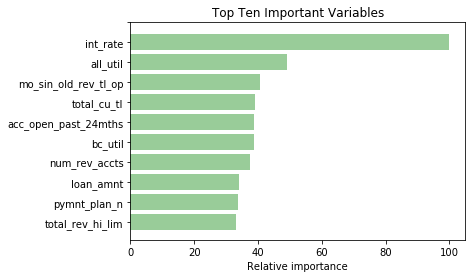

In [116]:
feature_importance = est.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10),feature_importance[indices],color='green',alpha=0.4)
plt.yticks(np.arange(10+0.25),np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')